In [3]:
from midiutil import MIDIFile


def generate_midi(midi_data, filename):
    # Create a single track MIDI file
    midi = MIDIFile(1)

    # Track, channel, pitch, time, duration, volume
    for note, start_time, duration in midi_data:
        pitch = note_name_to_midi(note)
        midi.addNote(0, 0, pitch, start_time, duration, 100)

    # Write to file
    with open(filename, 'wb') as f:
        midi.writeFile(f)

def note_name_to_midi(note):
    # Define the note dictionary
    note_to_midi = {
        'C' : 0,
        'C#' : 1, 'Db' : 1,
        'D' : 2,
        'D#' : 3, 'Eb' : 3,
        'E' : 4,
        'F' : 5,
        'F#' : 6, 'Gb' : 6,
        'G' : 7,
        'G#' : 8, 'Ab' : 8,
        'A' : 9,
        'A#' : 10, 'Bb' : 10,
        'B' : 11
    }

    # Split the note into pitch and octave
    if len(note) == 3: # Means it includes a sharp, e.g. "C#4"
        pitch, octave = note[0:2], note[2]
    else:
        pitch, octave = note[0], note[1]
    
    # Calculate the MIDI note number
    midi_num = note_to_midi[pitch] + (int(octave) + 1) * 12

    return midi_num

In [19]:
midi_data_bassline = [
    # Bar 1
    ('D3', 0.75, 0.25), ('A2', 1.25, 0.25), ('F3', 1.75, 0.25), ('A2', 2.25, 0.75),
    # Bar 2
    ('D3', 3, 0.25), ('F2', 3.5, 0.5), ('A2', 4.25, 0.75),
    # Bar 3
    ('D3', 5, 0.25), ('A2', 5.5, 0.5), ('F3', 6, 0.5), ('A2', 6.75, 0.25),
    # Bar 4
    ('D3', 7.25, 0.25), ('F2', 7.75, 0.25), ('A2', 8, 0.5), ('D2', 8.75, 0.25)
]

midi_data_synth_lead = [
    # Bar 1
    ('A4', 0, 0.5), ('D5', 0.5, 0.5), ('F5', 1.5, 0.5), ('D5', 2.5, 0.25), ('A4', 3.5, 0.5),
    # Bar 2
    ('A4', 4, 0.5), ('D5', 4.75, 0.25), ('F5', 5.5, 0.5), ('D5', 6.5, 0.5), ('A4', 7.5, 0.5),
    # Bar 3
    ('F5', 8, 0.5), ('A4', 8.5, 0.5), ('D5', 9.5, 0.5), ('A4', 10.5, 0.5), ('F5', 11.5, 0.5),
    # Bar 4
    ('D5', 12, 0.5), ('F5', 12.5, 0.5), ('A4', 13.5, 0.5), ('D5', 14.5, 0.5), ('F5', 15.5, 0.5)
]

midi_data_chords = [
    # Bar 1
    ('D3', 0, 4), ('F3', 0, 4), ('A3', 0, 4),  # Dm
    # Bar 2
    ('C3', 4, 4), ('E3', 4, 4), ('G3', 4, 4),  # C Major
    # Bar 3
    ('B2', 8, 4), ('D3', 8, 4), ('F3', 8, 4),  # Bb Major
    # Bar 4
    ('A2', 12, 4), ('C3', 12, 4), ('E3', 12, 4)  # A minor
]



In [17]:
generate_midi(midi_data_bassline, 'midi/bass.mid')

In [18]:
generate_midi(midi_data_synth_lead, 'midi/synth_lead.mid')

In [20]:
generate_midi(midi_data_chords, 'midi/chords.mid')

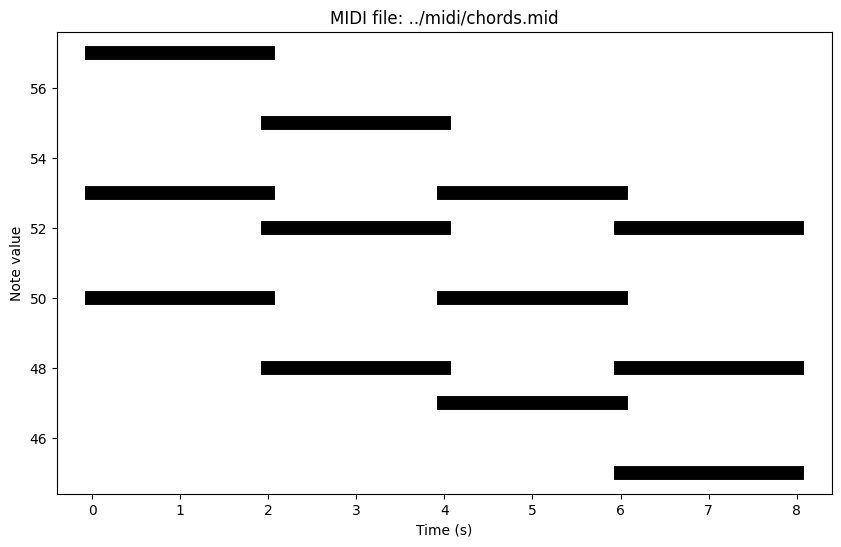

In [4]:
import numpy as np
from mido import MidiFile
import matplotlib.pyplot as plt

def plot_midi(file_path):
    mid = MidiFile(file_path)

    notes = []
    start_times = []
    durations = []

    time = 0
    for msg in mid:
        time += msg.time
        if not msg.is_meta and msg.channel == 0:
            if msg.type == 'note_on':
                data = msg.bytes()
                notes.append(data[1])
                start_times.append(time)
            elif msg.type == 'note_off':
                durations.append(time - start_times[-1])

    # Make sure all notes have a corresponding duration
    if len(durations) < len(start_times):
        durations.append(time - start_times[-1])

    fig, ax = plt.subplots(figsize=(10, 6))

    for i in range(len(notes)):
        ax.plot([start_times[i], start_times[i] + durations[i]], [notes[i], notes[i]], color='black', linewidth=10)

    plt.ylabel('Note value')
    plt.xlabel('Time (s)')
    plt.title(f'MIDI file: {file_path}')
    plt.show()

plot_midi('../midi/chords.mid')
